Saving Screenshot 2025-09-06 160902.png to Screenshot 2025-09-06 160902.png
Uploaded file: Screenshot 2025-09-06 160902.png


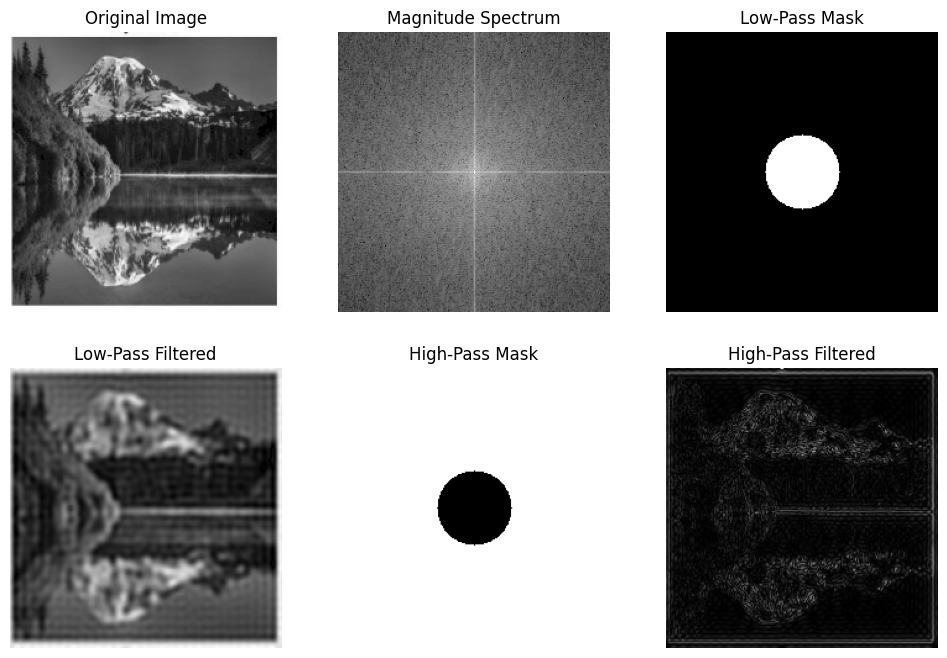

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload the image file (will open file selector)
uploaded = files.upload()

# Get the filename (assumes only one file uploaded)
filename = list(uploaded.keys())[0]
print(f"Uploaded file: {filename}")

# Read image in grayscale
img = cv2.imread(filename, 0)

if img is None:
    raise ValueError("Failed to load image. Make sure the file is an image.")

# Fourier Transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

# Create masks
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

# Low Pass Filter Mask
mask_lpf = np.zeros((rows, cols), np.uint8)
r = 30
cv2.circle(mask_lpf, (ccol, crow), r, 1, -1)

# High Pass Filter Mask
mask_hpf = 1 - mask_lpf

# Apply masks
fshift_lpf = fshift * mask_lpf
fshift_hpf = fshift * mask_hpf

# Inverse Fourier Transform
img_lpf = np.fft.ifft2(np.fft.ifftshift(fshift_lpf))
img_lpf = np.abs(img_lpf)

img_hpf = np.fft.ifft2(np.fft.ifftshift(fshift_hpf))
img_hpf = np.abs(img_hpf)

# Display results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray')
plt.title("Original Image"), plt.axis("off")

plt.subplot(2, 3, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum"), plt.axis("off")

plt.subplot(2, 3, 3), plt.imshow(mask_lpf * 255, cmap='gray')
plt.title("Low-Pass Mask"), plt.axis("off")

plt.subplot(2, 3, 4), plt.imshow(img_lpf, cmap='gray')
plt.title("Low-Pass Filtered"), plt.axis("off")

plt.subplot(2, 3, 5), plt.imshow(mask_hpf * 255, cmap='gray')
plt.title("High-Pass Mask"), plt.axis("off")

plt.subplot(2, 3, 6), plt.imshow(img_hpf, cmap='gray')
plt.title("High-Pass Filtered"), plt.axis("off")

plt.show()


